In [2]:
# import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../utils/')
from neuralNet import NeuralNet
from search import gridSearchCV
sns.set_style("darkgrid")

from search import ParamGrid

# Loading data



In [3]:
def vectorized_result(j):

    y = np.zeros((10, 1))
    y[j] = 1.0
    return y



data = pd.read_csv('./../data/part1.csv', header=None)

X = np.array(data.iloc[:, :784])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, len(X))
np.random.shuffle(idx)
frac = int(0.8*len(X))
train_x = [np.reshape(x, (-1, 1)) for x in X[idx[:frac]]]
train_y = [vectorized_result(y) for y in Y[idx[:frac]]]
train_data = list(zip(train_x, train_y))
test_x = [np.reshape(x, (-1, 1)) for x in X[idx[frac:]]]
test_y = Y[idx[frac:]]
test_data = list(zip(test_x, test_y))


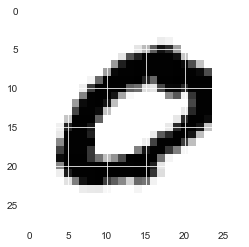

In [20]:
# Visualize data
plt.imshow(X[10].reshape(28,28),cmap=plt.cm.binary)
plt.show()

### Sigmoid Function 

In [61]:
# Working with Sigmoid activation function
model_sigmoid = NeuralNet(size=[784,200,30,10],cost='cross_entropy_cost',neuron_type='sigmoid')


# Tuning deciding the epoch and bacth size 
# Grid search CV
# params = {
#     'neuron_type': ['sigmoid'],
#     'epoch': [10],
#     'eta': [1e0],
#     'cost': ['cross_entropy_cost'],
#     'sizes': [[784, 30, 10]],
#     'batch_size': [1, 4, 8, 16],
#     'lmbda': [0]

# }

train_accuracy, train_cost, test_accuracy, test_cost= model_sigmoid.fit(
    train_data, epochs=40, eta=3, test_data=test_data, lmda=0, mini_batch_size=4,verbose=False)




Text(0.5, -0.05, 'layers [784,30,10] ,eta= 3 , Sigmoid , cross-entropy-loss, batch_size=1 ')

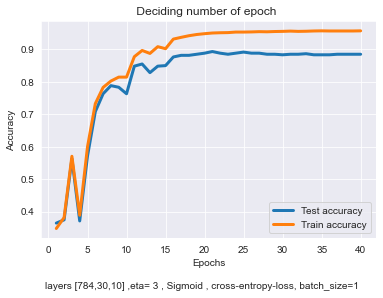

In [62]:
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
             y=test_accuracy, ax=ax, label='Test accuracy',linewidth=3)
sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
             y=train_accuracy, ax=ax, label='Train accuracy',linewidth=3)
ax.set_title(" Deciding number of epoch  ")
# ax.legend(['test_accuracy','train_accuracy','layers [784,30,10] ,eta= 3'])
ax.set_xlabel('Epochs'),ax.set_ylabel('Accuracy')
fig.text(.5, -0.05,
         'layers [784,30,10] ,eta= 3 , Sigmoid , cross-entropy-loss, batch_size=1 ', ha='center')


[784, 30, 10]


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/neuron.py:10: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


[784, 30, 10]
[784, 30, 10]
[784, 30, 10]
[784, 30, 10]


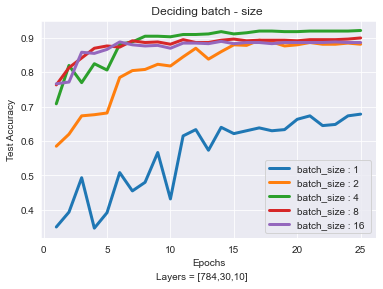

In [57]:
# Hence epoch =25 taken for future reference

# Decidin the batch size 
params = ParamGrid(paramGrid={'batch_size':[1,2,4,8,16],
                            'epoch':[25],
                            'neuron_type':['sigmoid'],
                            'lmbda':[0],
                            'eta':[3],
                            'cost':['cross_entropy_cost'],
                            'layers':[[784,30,10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print(param['layers'])
    nn  = NeuralNet(cost=param['cost'],size=param['layers'],neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)
    
    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                y=test_accuracy, ax=ax, label=   f'batch_size : {param["batch_size"]} ', linewidth=3)

ax.set_title(" Deciding batch - size  ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')

fig.text(0.5,-0.02, 'Layers = [784,30,10] ',ha='center')
plt.show()


[784, 30, 10]
[784, 30, 10]
[784, 30, 10]
[784, 30, 10]


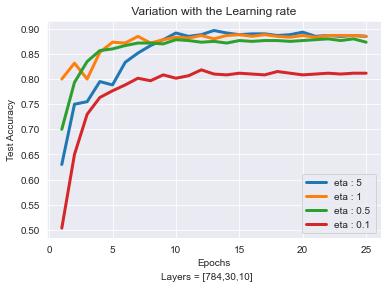

In [60]:
# Batch size= 4 ,epochs =20

# Finding the best learning rate 

params = ParamGrid(paramGrid={'batch_size': [4],
                              'epoch': [25],
                              'neuron_type': ['sigmoid'],
                              'lmbda': [0],
                              'eta': [5,1,5e-1,1e-1],
                              'cost': ['cross_entropy_cost'],
                              'layers': [[784, 30, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print(param['layers'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'eta : {param["eta"]} ', linewidth=3)

ax.set_title(" Variation with the Learning rate ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')

fig.text(0.5, -0.02, 'Layers = [784,30,10] ', ha='center')
plt.show()



**eta=1 , epochs=20, mini_batch=4**

Training [784, 30, 10]
Training [784, 100, 10]
Training [784, 100, 30, 10]
Training [784, 200, 30, 10]


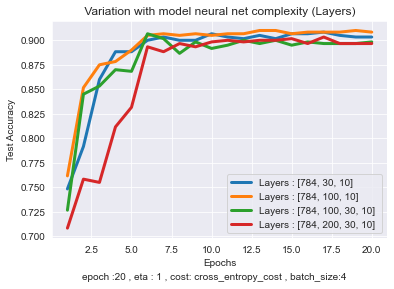

In [65]:
#  tuning the number of hidden layers and sizes 

params = ParamGrid(paramGrid={'batch_size': [4],
                              'epoch': [20],
                              'neuron_type': ['sigmoid'],
                              'lmbda': [0],
                              'eta': [1],
                              'cost': ['cross_entropy_cost'],
                              'layers': [[784, 30, 10],  [784,100, 10],[784,100,30, 10], [784, 200,30, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print('Training',  param['layers'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'Layers : {param["layers"]} ', linewidth=3)

ax.set_title(" Variation with model neural net complexity (Layers) ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')

fig.text(0.5, -0.02, f'epoch :{param["epoch"]} , eta : {param["eta"]} , cost: {param["cost"]} , batch_size:{param["batch_size"]}', ha='center')
plt.show()


Training lmbda 0
Training lmbda 0.1
Training lmbda 0.01
Training lmbda 0.001
Training lmbda 0.0001
Training lmbda 1e-05


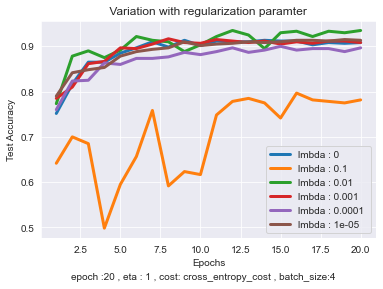

In [73]:
# Tuning the paramter lmbda
params = ParamGrid(paramGrid={'batch_size': [4],
                              'epoch': [20],
                              'neuron_type': ['sigmoid'],
                              'lmbda': [0,1e-1,1e-2,1e-3,1e-4,1e-5],
                              'eta': [1],
                              'cost': ['cross_entropy_cost'],
                              'layers': [[784, 30, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print('Training lmbda',  param['lmbda'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'lmbda : {param["lmbda"]} ', linewidth=3)

ax.set_title(" Variation with regularization paramter ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')
# ax.set_yticks(np.arange(0.0,1.1,0.1))

fig.text(0.5, -0.02,
         f'epoch :{param["epoch"]} , eta : {param["eta"]} , cost: {param["cost"]} , batch_size:{param["batch_size"]}', ha='center')
plt.show()


Training lmbda 0.01
Training lmbda 0.01


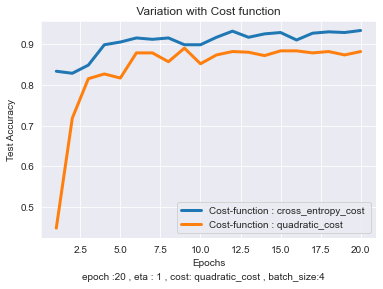

In [74]:
# Tuning the cost function
params = ParamGrid(paramGrid={'batch_size': [4],
                              'epoch': [20],
                              'neuron_type': ['sigmoid'],
                              'lmbda': [1e-2],
                              'eta': [1],
                              'cost': ['cross_entropy_cost','quadratic_cost'],
                              'layers': [[784, 30, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print('Training lmbda',  param['lmbda'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'Cost-function : {param["cost"]} ', linewidth=3)

ax.set_title(" Variation with Cost function ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')
# ax.set_yticks(np.arange(0.0,1.1,0.1))

fig.text(0.5, -0.02,
         f'epoch :{param["epoch"]} , eta : {param["eta"]} , cost: {param["cost"]} , batch_size:{param["batch_size"]}', ha='center')
plt.show()


In [76]:
# Grid_search
params = {  
        'batch_size': [4],
        'epoch': [15],
        'neuron_type': ['sigmoid'],
        'lmbda': [1e-2,5e-3,1e-3],
        'eta': [1],
        'cost': ['cross_entropy_cost'],
        'sizes': [[784, 30, 10],[784,100,10]]
        }

gg =gridSearchCV(params)
gg.fit(X,Y)


Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.01, 'neuron_type': 'sigmoid', 'sizes': [784, 30, 10]}
Scores :  {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.01, 'neuron_type': 'sigmoid', 'sizes': [784, 30, 10], 'train_accuracy': 0.9520833333333334, 'train_cost': 0.5218406698465294, 'test_accuracy': 0.8983333333333333, 'test_cost': 0.7290283306560734}
Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.01, 'neuron_type': 'sigmoid', 'sizes': [784, 100, 10]}
Scores :  {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.01, 'neuron_type': 'sigmoid', 'sizes': [784, 100, 10], 'train_accuracy': 0.9544166666666667, 'train_cost': 0.47257077004433384, 'test_accuracy': 0.9003333333333334, 'test_cost': 0.6939266410652256}
Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.005, 'neuron_type':

In [95]:
# visaulizing the grid cv results
cv_results =pd.DataFrame(gg.cv_results)
# cv_results['sizes'] = [ ele[1:-1] for ele in cv_results['sizes']]
cv_results['layers'] = [','.join(map(str, l)) for l in cv_results['sizes']]
cv_results


,batch_size,cost,epoch,eta,lmbda,neuron_type,sizes,train_accuracy,train_cost,test_accuracy,test_cost,layers
0,4,cross_entropy_cost,15,1,0.005,sigmoid,"[784, 100, 10]",0.985333,0.263838,0.925667,0.579876,"784,100,10"
1,4,cross_entropy_cost,15,1,0.005,sigmoid,"[784, 30, 10]",0.976667,0.334163,0.919000,0.633954,"784,30,10"
2,4,cross_entropy_cost,15,1,0.001,sigmoid,"[784, 100, 10]",0.999833,0.072980,0.913000,0.677924,"784,100,10"
3,4,cross_entropy_cost,15,1,0.010,sigmoid,"[784, 100, 10]",0.954417,0.472571,0.910333,0.693927,"784,100,10"
4,4,cross_entropy_cost,15,1,0.010,sigmoid,"[784, 30, 10]",0.952083,0.521841,0.908333,0.729028,"784,30,10"
5,4,cross_entropy_cost,15,1,0.001,sigmoid,"[784, 30, 10]",0.986833,0.187792,0.904000,0.701899,"784,30,10"


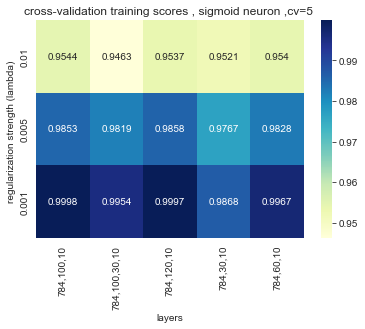

In [117]:
plt.figure()
ax = sns.heatmap(cv_results.pivot('lmbda', 'layers', 'train_accuracy'),
                 annot=True, cmap='YlGnBu', fmt='.4g')
ax.set_title('cross-validation training scores , sigmoid neuron ,cv=5 ')
ax.set_xlabel('layers'), ax.invert_yaxis()

ax.set_ylabel('regularization strength (lambda) ')
plt.show()


In [ ]:
# adding more configurations
# Grid_search
params = {
    'batch_size': [4],
    'epoch': [15],
    'neuron_type': ['sigmoid'],
    'lmbda': [1e-2, 5e-3, 1e-3],
    'eta': [1],
    'cost': ['cross_entropy_cost'],
    'sizes': [[784, 200,10]]
}

gg2 = gridSearchCV(params)
gg2.fit(X, Y)


In [ ]:
df2 = pd.DataFrame(gg2.cv_results)
df2['layers'] = [','.join(map(str, l)) for l in df2['sizes']]

df2

In [ ]:
cv_results = cv_results.append(df2,ignore_index=True)
cv_results

## Comparison with tenserflow

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV 

In [31]:

X = np.array(data.iloc[:, :784])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, len(X))
np.random.shuffle(idx)
frac = int(0.9*len(X))
train_images = np.array([np.reshape(x, (28, 28)) for x in X[idx[:frac]]])
train_labels= Y [idx[:frac]]

test_x = np.array( [np.reshape(x, (28,28)) for x in X[idx[frac:]]])
test_y = Y[idx[frac:]]



In [27]:
train_labels[1]

0